# 第二章 基础二维图
## 2.6 饼图

In [1]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体
import matplotlib.pyplot as plt

## 读取数据

In [8]:
filename_ventfield='data/VentFields/vent_fields_all.csv'
result=pd.read_csv(filename_ventfield)
# print(result.keys())


## 基本饼图

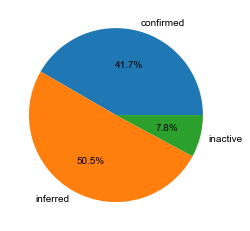

In [19]:
# 获取数据
Activity=result['Activity']
Activity_unique=np.unique(Activity)
labels=[]
sizes=[]

for activity in Activity_unique:
    labels.append(activity.split(' ')[-1])
    sizes.append(len(Activity[Activity==activity]))
    
# 绘图
fig=plt.figure(figsize=(4,4))
ax=plt.gca()

ax.pie(sizes, labels=labels, autopct='%.1f%%')

plt.show()

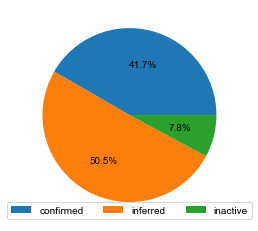

In [28]:
# 绘图
fig=plt.figure(figsize=(4,4))
ax=plt.gca()

wedges, texts, autotexts=ax.pie(sizes, autopct='%.1f%%')
ax.legend(handles=wedges, labels=labels, ncol=3, loc='lower center')

figname='../../figures/Chapter2/Lecture2_6_traing2.pdf'
plt.savefig(figname,bbox_inches='tight')
# os.system('pdfcrop '+figname+' '+figname)
plt.show()

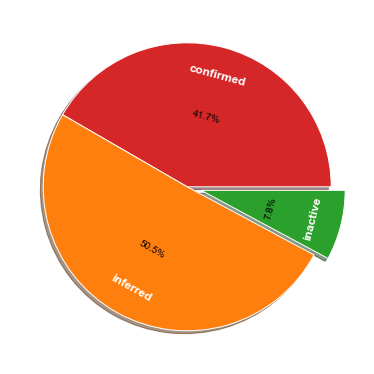

In [59]:
# 绘图
fig=plt.figure(figsize=(5,5))
ax=plt.gca()

explode=(0,0,0.1)
colors=['#d62728','#ff7f0e','#2ca02c']
wedgeprops={'lw':1}
wedges, texts, autotexts=ax.pie(sizes,labels=labels, autopct='%.1f%%', explode=explode, shadow=True,
                               colors=colors,startangle=0, wedgeprops=wedgeprops, labeldistance=0.8, pctdistance=0.5)
for wedge, text, autotext in zip(wedges, texts, autotexts):
    theta=(wedge.theta1+wedge.theta2)/2
    rotation=theta-90 if theta<=180 else theta-90-180
    plt.setp(wedge, ec='w')
    plt.setp(text, rotation=rotation, ha='center', va='center', fontsize=12, fontweight='bold', color='w')
    plt.setp(autotext, rotation=rotation, ha='center', va='center')
plt.tight_layout(pad=0)
plt.show()

## 嵌套饼图

In [68]:
# print(result.keys())
result=result.fillna(-999)
lon=np.array(result['Longitude'], dtype=float)
lat=np.array(result['Latitude'], dtype=float)
Tectonic=np.array(result['Tectonic setting'],str)
ind_MOR=(Tectonic=='mid-ocean ridge')
# ------------------ 洋中脊扩张速率 ---------------------------------------------
SpreadingRate=result['Full Spreading Rate (mm/a)'].values
ind_rate=SpreadingRate!=-999
ind_ulslow= (SpreadingRate>0) & (SpreadingRate<=20)
ind_slow= (SpreadingRate>20) & (SpreadingRate<=50)
ind_medi=(SpreadingRate>50) & (SpreadingRate<=80)
ind_fast=(SpreadingRate>80) & (SpreadingRate<=120)
ind_ulfast=(SpreadingRate>120)
ind_rate_ridge=ind_MOR & ind_rate
# ------------------ 热液喷口温度 ---------------------------------------------
T=result['Maximum Temperature'].values
T_cat=np.array(result['Max Temperature Category'])
# 1.1. lon_lat_highT
ind_highT=((T>=300) | (T_cat == 'High'))
# 1.2. low temperature
ind_lowT=((T<300) & (T>0) | (T_cat == 'Low'))
# 1.3. inactive
ind_inactive=~(ind_highT | ind_lowT)
# --------------汇总数据-------------
num_SpreadingRate=[len(lon[ind_ulslow & ind_rate_ridge]),
                  len(lon[ind_slow & ind_rate_ridge]),
                  len(lon[ind_medi & ind_rate_ridge]),
                  len(lon[ind_fast & ind_rate_ridge]),
                  len(lon[ind_ulfast & ind_rate_ridge])]
label_SpreadingRate=['Ultra-slow','Slow','Medium','Fast','Super fast']
num_MOR_T=[len(lon[ind_highT & ind_MOR]),
                  len(lon[ind_lowT & ind_MOR]),
                  len(lon[ind_inactive & ind_MOR])]
label_MOR_T=['High T','Low T', 'Inactive']

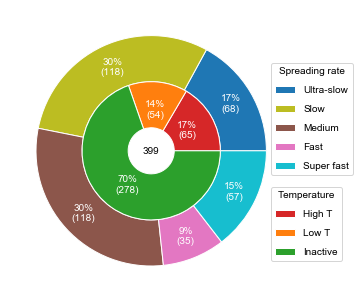

In [103]:
# print(num_SpreadingRate, label_SpreadingRate, num_MOR_T,label_MOR_T)
def func(pct, allvalues):
    return "{:.0f}%\n({:d})".format(pct, int(pct/100*allvalues))

figsize=(5, 4)


fig=plt.figure(figsize=figsize)
ax=plt.gca()

radius=1
thick=0.4
wedgeprops=dict(width=thick, ec='w')
colors1=['#1f77b4','#bcbd22','#8c564b','#e377c2','#17becf']
colors2=['#d62728','#ff7f0e','#2ca02c']

wedges1, labels1, pcts1=ax.pie(num_SpreadingRate, radius=radius, wedgeprops=wedgeprops, colors=colors1, 
       autopct=lambda pct: func(pct,np.sum(num_SpreadingRate)), pctdistance=radius-thick/2)
wedges2, labels2, pcts2=ax.pie(num_MOR_T, radius=radius-thick, wedgeprops=wedgeprops, colors=colors2, autopct=lambda pct: func(pct,np.sum(num_MOR_T)),)

plt.setp(pcts1, color='w')
plt.setp(pcts2, color='w')
# legend
x_leg=0.9
leg1=ax.legend(handles=wedges1, labels=label_SpreadingRate, title='Spreading rate', loc='lower left', 
               bbox_to_anchor=(x_leg, 0.4), labelspacing=1)
ax.add_artist(leg1)
leg2=ax.legend(handles=wedges2, labels=label_MOR_T, title='Temperature', loc='lower left', 
               bbox_to_anchor=(x_leg, 0.1), labelspacing=1)

ax.text(0,0, str('%.0f'% (np.sum(num_MOR_T))), ha='center', va='center')

plt.tight_layout(pad=0)
plt.show()
